<a href="https://colab.research.google.com/github/SarahFeanor/Portfolio-DataScience/blob/main/A_An%C3%A1lise_de_Risco_de_Cr%C3%A9dito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<sub> 🔗[GitHub](https://github.com/SarahFeanor) | [LinkedIn](https://www.linkedin.com/in/sarahfrezende/) | [Portfólio](https://github.com/sarahfeanor/Portfolio-DataScience) | [Medium](https://medium.com/@sarahfrezende)  </sub>

📂 Projeto | Data Science | By Sarah Faria Rezende

---



# **A Análise de Risco de Crédito**

Um dos maiores desafios das instituições financeiras reside na gestão do risco de crédito, pois a falta de cumprimento das obrigações de pagamento pode desencadear perdas financeiras substanciais. A habilidade de avaliar a capacidade de um indivíduo em honrar suas responsabilidades financeiras é de importância crucial para o êxito das instituições financeiras. Como resposta a essa demanda, têm sido elaboradas soluções cada vez mais sofisticadas visando atenuar o risco associado à inadimplência.

* **Default**: um termo amplamente utilizado para caracterizar a inadimplência, o qual indica a incapacidade do mutuário em cumprir com suas obrigações financeiras. Geralmente, a falta de pagamento resulta da fragilidade financeira do cliente, podendo ser ocasionada por diversos fatores, como a perda de emprego, enfermidade ou circunstâncias imprevistas.

A crescente colaboração entre grandes **bancos** e **fintechs** tem intensificado o investimento em modelos de Machine Learning visando evitar a inadimplência de clientes. Esses modelos se baseiam em histórico de pagamentos, pontuação de crédito, renda e outros dados para avaliar riscos, embasando decisões sobre empréstimos e investimentos.



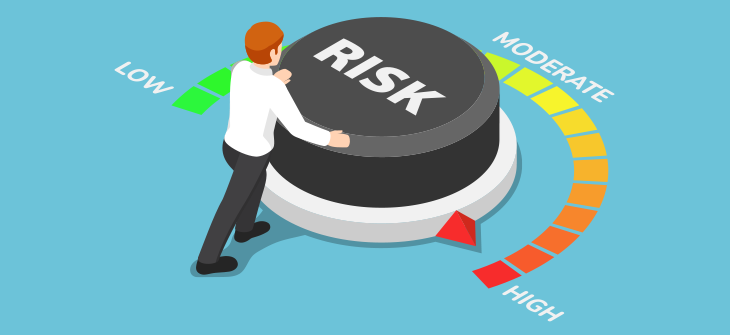

# 📍 **Objetivo**

Este projeto visa explorar dados do ***Nubank***, uma instituição financeira, para realizar uma análise minuciosa e construir um modelo de previsão de inadimplência.

## O que irei fazer?

* **Desenvolver um modelo de previsão de inadimplência do cliente.**

Nosso intuito é criar um modelo que não apenas reduza as perdas financeiras do Nubank, mas também minimize a ocorrência de falsos positivos.

### Tópicos:

*  **1 - Obteção dos Dados**
  *   Importando Dados e pacotes necessários
*  **2 - Análise dos Dados**
  * Dicionario das Variaveis

# 📂 Obtenção dos Dados

Os dados deste Projeto de Data Science originam-se de uma competição promovida pela **Startup Nubank**, visando identificar talentos para possível contratação na Fintech. O conjunto de dados utilizado na análise pode ser acessado através deste [link](http://dl.dropboxusercontent.com/s/xn2a4kzf0zer0xu/acquisition_train.csv?dl=0).

Embora não contenham informações explícitas, os nomes das colunas fornecem pistas relevantes para compreender a natureza do problema.

### **Importando dados e pacotes necessários**

In [1]:
# Imports de bibliotecas padrão
import pandas as pd
import numpy as np
import warnings
import re

# Imports para visualização
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap

# Imports para modelagem
from sklearn.metrics import precision_recall_curve, classification_report, f1_score, recall_score, confusion_matrix
from sklearn.model_selection import cross_val_score, StratifiedKFold, cross_val_predict, GridSearchCV, train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter


# Configurações
warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:.2f}'.format
pd.set_option('display.max_rows', None)


In [ ]:
pip install scikit-plot

In [ ]:
pip install category_encoders


In [4]:
import scikitplot as skplt
from category_encoders import HashingEncoder

In [5]:
#Importando os dados
df = pd.read_csv("http://dl.dropboxusercontent.com/s/xn2a4kzf0zer0xu/acquisition_train.csv?dl=0")

# **Análise dos Dados**

Esta fase visa proporcionar uma compreensão profunda da estrutura dos dados, permitindo um discernimento mais claro sobre suas características e padrões.


## **Dicionário das variáveis**

- `ids`: ID único do candidato.
- `target_default`: variável alvo indicando se o candidato é um bom pagador (0) ou se ele entrou em inadimplência (1).
- `score_1 a score_6`: valores de pontuação de diferentes fontes.
- `risk_rate`: taxa de risco do candidato.
- `last_amount_borrowed`: valor do último empréstimo solicitado.
- `last_borrowed_in_months`: número de meses desde que o último empréstimo foi solicitado.
- `credit_limit`: limite de crédito do candidato.
- `reason`: razão para solicitação do empréstimo.
- `income`: renda declarada pelo candidato.
- `facebook_profile`: indica se o candidato tem um perfil no Facebook associado à sua conta.
- `state`: estado em que o candidato reside.
- `zip`: código postal do candidato.
- `channel`: canal pelo qual o candidato se inscreveu.
- `job_name`: nome da profissão do candidato.
- `real_state`: status do imóvel do candidato.
- `ok_since`: número de meses desde que o candidato forneceu uma resposta satisfatória.
- `n_bankruptcies`: número de falências anteriores do candidato.
- `n_defaulted_loans`: número de empréstimos inadimplentes do candidato.
- `n_accounts`: número de contas abertas pelo candidato.
- `n_issues`: número de problemas relatados pelo candidato.
- `application_time_applied`: hora em que o candidato fez a inscrição.
- `application_time_in_funnel`: tempo que o candidato passou no funil de inscrição.
- `email`: endereço de e-mail do candidato.
- `external_data_provider_credit_checks_last_2_year`: número de verificações de crédito nos últimos dois anos.
- `external_data_provider_credit_checks_last_month`: número de verificações de crédito no último mês.
- `external_data_provider_credit_checks_last_year`: número de verificações de crédito no último ano.
- `external_data_provider_email_seen_before`: indica se o endereço de e-mail do candidato já foi visto antes.
- `external_data_provider_first_name`: primeiro nome do candidato em uma fonte externa.
- `external_data_provider_fraud_score`: pontuação de fraude do candidato em uma fonte externa.
- `lat_lon`: coordenadas geográficas do candidato.
- `marketing_channel`: canal de marketing pelo qual o candidato foi adquirido.
- `profile_phone_number`: número de telefone do candidato.
- `reported_income`: renda relatada pelo candidato.
- `shipping_state`: estado para o qual o produto será enviado.
- `shipping_zip_code`: código postal para o qual o produto será enviado.
- `profile_tags`: tags associadas ao perfil do candidato.
- `user_agent`: informações sobre o navegador e o dispositivo do candidato.
- `target_fraud`: variável alvo indicando se o candidato é fraudulento (1) ou não (0).


Análise Exploratória de Dados
Nesta fase, iremos realizar uma exploração inicial das variáveis presentes no conjunto de dados, visando compreender os seguintes aspectos:

* 1 - Contexto geral das variáveis
- 2 - Percentual de valores ausentes
- 3 - Análise das características em grupos distintos
- 4 - Avaliação do balanceamento do conjunto de dados

Além disso, daremos início ao processo de Engenharia de Recursos, começando por examinar as cinco primeiras entradas do conjunto de dados para obter uma visão geral de sua estrutura.

O ponto de partida consiste em compreender a dimensão dos dados presentes no conjunto.

In [6]:
#Imprimindos a dimensão das linhas e variáveis da base de dados
print("Quantidade de dados: ", df.shape[0])
print("Quantidade de variáveis: ", df.shape[1])

Quantidade de dados:  45000
Quantidade de variáveis:  43


Na sequência, iremos avaliar as 5 primeiras e últimas linhas do dataframe.

In [7]:
#Imprimindo as 5 primeiras linhas
df.head()

,ids,target_default,score_1,score_2,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,...,external_data_provider_fraud_score,lat_lon,marketing_channel,profile_phone_number,reported_income,shipping_state,shipping_zip_code,profile_tags,user_agent,target_fraud
0,343b7e7b-2cf8-e508-b8fd-0a0285af30aa,False,1Rk8w4Ucd5yR3KcqZzLdow==,IOVu8au3ISbo6+zmfnYwMg==,350.00,101.80,0.26,108.43,0.40,25033.92,...,645,"(-29.151545708122246, -51.1386461804385)",Invite-email,514-9840782,57849.00,BR-MT,17528,"{'tags': ['n19', 'n8']}",Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...,NaN
1,bc2c7502-bbad-0f8c-39c3-94e881967124,False,DGCQep2AE5QRkNCshIAlFQ==,SaamrHMo23l/3TwXOWgVzw==,370.00,97.06,0.94,92.00,0.24,NaN,...,243,"(-19.687710705798963, -47.94151536525154)",Radio-commercial,251-3659293,4902.00,BR-RS,40933,"{'tags': ['n6', 'n7', 'nim']}",Mozilla/5.0 (Linux; Android 5.0.2; SAMSUNG SM-...,NaN
2,669630dd-2e6a-0396-84bf-455e5009c922,True,DGCQep2AE5QRkNCshIAlFQ==,Fv28Bz0YRTVAT5kl1bAV6g==,360.00,100.03,0.35,112.89,0.29,7207.92,...,65,"(-28.748023890412284, -51.867279334353995)",Waiting-list,230-6097993,163679.00,BR-RR,50985,"{'tags': ['n0', 'n17', 'nim', 'da']}",Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...,NaN
3,d235609e-b6cb-0ccc-a329-d4f12e7ebdc1,False,1Rk8w4Ucd5yR3KcqZzLdow==,dCm9hFKfdRm7ej3jW+gyxw==,510.00,101.60,0.99,94.90,0.32,NaN,...,815,"(-17.520650158450454, -39.75801139933186)",Waiting-list,261-3543751,1086.00,BR-RN,37825,{'tags': ['n4']},Mozilla/5.0 (Linux; Android 6.0; HTC One X10 B...,NaN
4,9e0eb880-e8f4-3faa-67d8-f5cdd2b3932b,False,8k8UDR4Yx0qasAjkGrUZLw==,+CxEO4w7jv3QPI/BQbyqAA==,500.00,98.47,0.53,118.13,0.18,NaN,...,320,"(-16.574259446978008, -39.90990074785962)",Invite-email,102-3660162,198618.00,BR-MT,52827,"{'tags': ['pro+aty', 'n19', 'da', 'b19']}",Mozilla/5.0 (Linux; Android 7.0; Pixel C Build...,NaN


Desde o início, podemos fazer algumas observações cruciais:

- A variável `ids` serve como um identificador exclusivo.
- A variável `target_default` é a variável alvo, indicando a probabilidade de o cliente tornar-se inadimplente.
- A variável `target_fraud`, possivelmente alvo de outro modelo, aponta a probabilidade de fraude por parte do cliente.
- Enquanto as variáveis `score_1` a `score_2` são strings, `score_3` a `score_6` são numéricas.
- A coluna `profile_tags` contém tags de descrição.

In [8]:
#Imprimindo as 5 últimas linhas
df.tail()

,ids,target_default,score_1,score_2,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,...,external_data_provider_fraud_score,lat_lon,marketing_channel,profile_phone_number,reported_income,shipping_state,shipping_zip_code,profile_tags,user_agent,target_fraud
44995,696cb747-1159-0a29-6731-8c52c6c42f5d,False,DGCQep2AE5QRkNCshIAlFQ==,SaamrHMo23l/3TwXOWgVzw==,280.00,96.38,0.42,103.67,0.17,14766.42,...,730,"(-22.486891256430695, -44.909010639017616)",Facebook,768-5074915,73417.00,BR-GO,52148,"{'tags': ['n1', 'n7', 'n4', 'n0']}",Mozilla/5.0 (Linux; Android 6.0.1; SM-G920V Bu...,NaN
44996,92cd9b1a-9a8e-43ad-5d96-8e999128b472,False,smzX0nxh5QlePvtVf6EAeg==,vJyc9xom9v7hwFMPTIpmKw==,370.00,96.12,0.69,97.98,0.27,NaN,...,28,"(-12.881449687799003, -46.43545330884514)",Waiting-list,772-3517810,26246.00,BR-RO,46084,"{'tags': ['n11', 'n5', 'n12']}",Mozilla/5.0 (X11; CrOS x86_64 8172.45.0) Apple...,NaN
44997,febdd174-cf18-0be1-feb8-38399dd67d9e,False,e4NYDor1NOw6XKGE60AWFw==,ky19q4V1ZqgL3jnHX0wKDw==,280.00,102.38,0.53,93.69,0.30,NaN,...,940,"(-23.888982131800983, -50.645313285616645)",Waiting-list,334-9885724,101252.00,BR-SP,30570,"{'tags': ['dfa', 'c55', 'pro+aty']}",Mozilla/5.0 (Linux; Android 5.0.2; LG-V410/V41...,NaN
44998,a0a5a872-6165-b939-b711-37d045a0b5a8,True,smzX0nxh5QlePvtVf6EAeg==,6J1ZMTzN5GKHXnhM4J1JbA==,240.00,100.48,0.21,86.76,0.37,NaN,...,459,"(-5.14769885524928, -37.98386842511541)",Instagram,238-9568414,129844.00,BR-SP,12742,"{'tags': ['n9', 'n2']}",Mozilla/5.0 (Linux; Android 5.0.2; SAMSUNG SM-...,NaN
44999,a7504e93-123a-f965-70c6-ab01a0d475f7,False,8k8UDR4Yx0qasAjkGrUZLw==,wkeCdGeu5sEv4/fjwR0aDg==,530.00,101.10,0.01,97.36,0.31,4226.74,...,781,"(-23.13900985246712, -52.29465769715389)",Facebook,296-8101743,112766.00,BR-MT,41693,"{'tags': ['dfa', 'c55', 'pro+aty', 'n8', 'n4']}",Mozilla/5.0 (iPhone; CPU iPhone OS 11_0 like M...,NaN


In [9]:
# Extrair o nome das colunas
df.columns

Index(['ids', 'target_default', 'score_1', 'score_2', 'score_3', 'score_4',
       'score_5', 'score_6', 'risk_rate', 'last_amount_borrowed',
       'last_borrowed_in_months', 'credit_limit', 'reason', 'income',
       'facebook_profile', 'state', 'zip', 'channel', 'job_name', 'real_state',
       'ok_since', 'n_bankruptcies', 'n_defaulted_loans', 'n_accounts',
       'n_issues', 'application_time_applied', 'application_time_in_funnel',
       'email', 'external_data_provider_credit_checks_last_2_year',
       'external_data_provider_credit_checks_last_month',
       'external_data_provider_credit_checks_last_year',
       'external_data_provider_email_seen_before',
       'external_data_provider_first_name',
       'external_data_provider_fraud_score', 'lat_lon', 'marketing_channel',
       'profile_phone_number', 'reported_income', 'shipping_state',
       'shipping_zip_code', 'profile_tags', 'user_agent', 'target_fraud'],
      dtype='object')

In [10]:
# Extrair o tipo das variáveis
df.dtypes

ids                                                  object
target_default                                       object
score_1                                              object
score_2                                              object
score_3                                             float64
score_4                                             float64
score_5                                             float64
score_6                                             float64
risk_rate                                           float64
last_amount_borrowed                                float64
last_borrowed_in_months                             float64
credit_limit                                        float64
reason                                               object
income                                              float64
facebook_profile                                     object
state                                                object
zip                                     

A princípio, as variáveis parecem possuir o tipo de dado adequado. Vou agora analisar a proporção de valores nulos.

In [11]:
# Porcentagem de item nulo
round(df.isnull().sum()/df.shape[0] * 100, 2).sort_values(ascending = False)

target_fraud                                       96.62
last_amount_borrowed                               66.57
last_borrowed_in_months                            66.57
ok_since                                           58.99
external_data_provider_credit_checks_last_2_year   50.28
external_data_provider_credit_checks_last_year     33.61
credit_limit                                       30.67
n_issues                                           25.65
facebook_profile                                    9.91
marketing_channel                                   7.95
job_name                                            7.41
target_default                                      7.24
external_data_provider_email_seen_before            4.96
lat_lon                                             3.03
user_agent                                          1.60
n_bankruptcies                                      1.55
n_defaulted_loans                                   1.28
reason                         


* As variáveis `last_amount_borrowed `e `last_borrowed_in_months` possuem **67%** dos itens nulos.
* A variável `target_fraud` apresenta uma taxa de **97%** de itens nulos.
* Mais de **50%** dos itens estão ausentes nas variáveis `ok_since` e `external_data_provider_credit_checks_last_2_year`.

A gestão dos dados ausentes é essencial neste contexto. Em etapas subsequentes, conduzirei uma análise mais detalhada para avaliar a importância das variáveis e determinar as estratégias ideais de imputação ou tratamento. Dado o número substancial de variáveis em questão, decidi categorizá-las em grupos específicos, com o objetivo de realizar uma análise abrangente e precisa.

**Categoria 1**: Indicadores Demográficos e Comportamentais

Neste primeiro agrupamento, englobamos as variáveis que delineiam as características demográficas e comportamentais dos candidatos.

Coletadas no instante da solicitação de empréstimo, essas informações abarcam elementos como a finalidade do empréstimo `razão`, a renda do requerente `income`, a presença de perfil no Facebook `facebook_profile`, a localização por estado e código postal `state`, `zip`, o canal de aquisição de cliente `channel`, a ocupação do requerente `job_name`, o tipo de propriedade residencial `real_state`, histórico de falências anteriores `n_bankruptcies`, empréstimos anteriores inadimplentes `n_defaulted_loans`, contas bancárias ativas `n_accounts`, registros de problemas `n_issues`, intervalo de tempo desde a solicitação `application_time_applied`, período decorrido no funil de empréstimo `application_time_in_funnel`, endereço de email `email`, coordenadas geográficas `lat_lon`, canal de marketing `marketing_channel`, número de telefone no perfil `profile_phone_number`, renda relatada `reported_income`, estado de envio `shipping_state`, código postal de envio `shipping_zip_code`, tags de perfil `profile_tags` e navegador utilizado pelo candidato `user_agent`.

In [12]:
df_group1 = df[['reason', 'income', 'facebook_profile', 'state', 'zip', 'channel', 'job_name',
    'real_state', 'n_bankruptcies', 'n_defaulted_loans', 'n_accounts', 'n_issues',
    'application_time_applied', 'application_time_in_funnel', 'email', 'lat_lon',
    'marketing_channel', 'profile_phone_number', 'reported_income', 'shipping_state',
    'shipping_zip_code', 'profile_tags', 'user_agent', 'target_default']].copy()

Veremos agora quantos **valores** **unicos** há nas variáveis `reason`, `state` e `real_state`. Essas variáveis estão codificadas a fim de deixar o conteúdo anônimo.

In [13]:
print("Variáveis únicas em reason: {}".format(df_group1.reason.nunique()))
print("Variáveis únicas em state: {}".format(df_group1.state.nunique()))
print("Variáveis únicas em real_state: {}".format(df_group1.real_state.nunique()))

Variáveis únicas em reason: 14874
Variáveis únicas em state: 50
Variáveis únicas em real_state: 5


* **Variáveis Únicas em ** `reason`: Foi identificado um total de **14.874** **motivos diferentes** para a solicitação de empréstimo. Isso indica uma grande **diversidade nas razões** pelas quais os candidatos estão buscando empréstimos. Essa amplitude pode trazer desafios ao analisar e agrupar essas razões de maneira eficaz, mas também pode fornecer **insights** valiosos sobre as necessidades variadas dos clientes.

* **Variáveis Únicas em** `state`: Há **50 valores** únicos no campo "**estado**", que provavelmente deveria indicar o estado no **Brasil** onde o candidato reside. No entanto, considerando que o Brasil possui **27** estados mais o Distrito Federal, a presença de 50 estados sugere a possibilidade de **erros de digitação ou inconsistências nos dados**. Seria aconselhável verificar e corrigir essas discrepâncias para garantir a precisão das análises subsequentes.

* **Variáveis Únicas em** `real_state`: O campo "real_state" exibe **5 valores únicos**. Isso pode indicar diferentes tipos de propriedades residenciais em que os candidatos residem. No entanto, convém verificar se esses valores correspondem a categorias predefinidas ou se há necessidade de normalização e agrupamento para uma análise mais coerente.

A seguir, pretendo visualizar a frequência dos valores no campo "marketing_channel" por meio da criação de um gráfico de barras.

Irei comparar a frequência de valores em `marketing_channel` plotando um gráfico de barras.

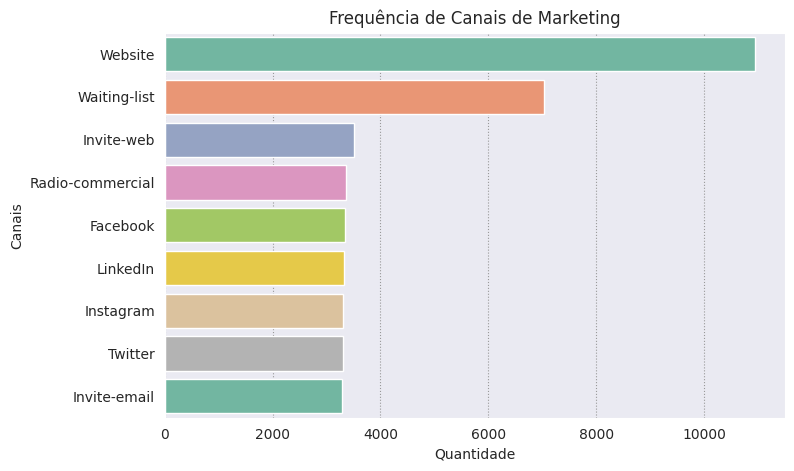

In [17]:
fig, ax = plt.subplots(figsize=(8, 5))

sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
custom_palette = sns.color_palette("Set2")

x = df_group1.marketing_channel.value_counts().values
y = df_group1.marketing_channel.value_counts().index

ax.set_title('Frequência de Canais de Marketing')
ax.set_ylabel('Canais')
ax.set_xlabel('Quantidade')

sns.barplot(x=x, y=y, ax=ax, palette=custom_palette)
plt.show()


A variável `marketing_channel` tem a função de identificar o canal de marketing pelo qual os candidatos foram adquiridos. Neste contexto, os canais dominantes são predominantemente "Website", "Lista de Espera" e "Convite da Web". Agora, procederemos à mesma visualização, porém focada nos emails, tanto para transações normais quanto para casos inadimplentes.

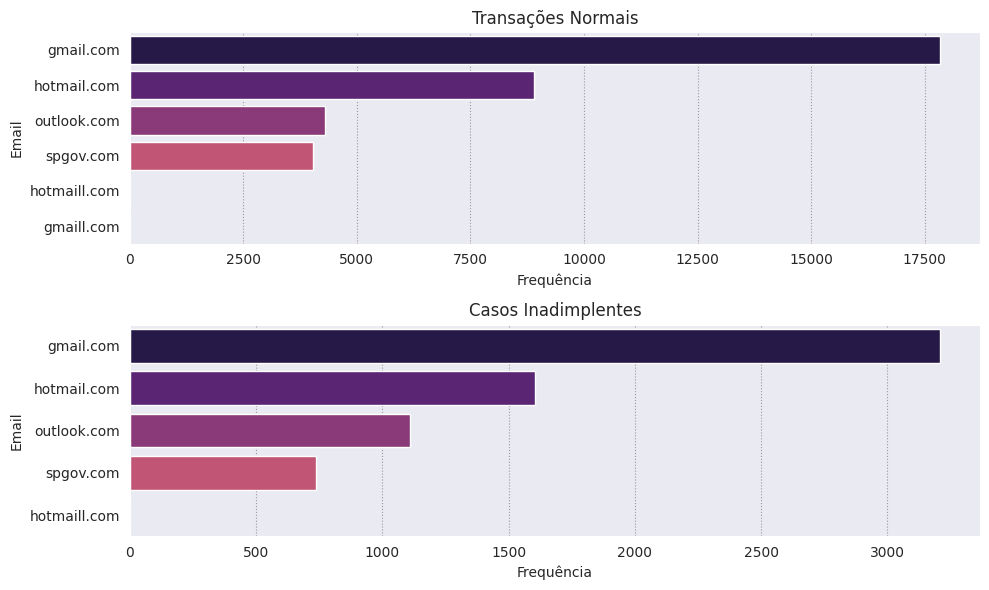

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10, 6))

x = df_group1.email.loc[df_group1.target_default == False].value_counts().values
y = df_group1.email.loc[df_group1.target_default == False].value_counts().index

xx = df_group1.email.loc[df_group1.target_default == True].value_counts().values
yy = df_group1.email.loc[df_group1.target_default == True].value_counts().index

sns.set_palette("magma")

sns.barplot(x=x, y=y, ax=ax[0])
ax[0].set_title('Transações Normais')
ax[0].set_xlabel('Frequência')
ax[0].set_ylabel('Email')

sns.barplot(x=xx, y=yy, ax=ax[1])
ax[1].set_title('Casos Inadimplentes')
ax[1].set_xlabel('Frequência')
ax[1].set_ylabel('Email')

plt.tight_layout()
plt.show()


De maneira geral, as distribuições se assemelham entre clientes que efetuaram pagamentos e aqueles que se tornaram inadimplentes.

Por fim, procederei à modificação da variável `shipping_state`, retirando o prefixo "BR-" dos rótulos e mantendo apenas o nome do estado.

In [21]:
df_group1['shipping_state'].value_counts()


BR-SP    6994
BR-AM    4037
BR-BA    2780
BR-GO    2634
BR-RR    1610
BR-MG    1527
BR-SE    1410
BR-DF    1402
BR-MA    1388
BR-RO    1371
BR-TO    1363
BR-PR    1359
BR-MS    1354
BR-RS    1352
BR-AP    1329
BR-PA    1326
BR-AC    1319
BR-AL    1318
BR-SC    1311
BR-PE    1309
BR-PB    1308
BR-RN    1307
BR-MT    1302
BR-CE    1301
BR-ES    1289
Name: shipping_state, dtype: int64

In [22]:
df_group1['shipping_state'] = df['shipping_state'] = df_group1['shipping_state'].str.replace('BR-', '')

Vamos verificar agora os 5 estados mais frequentes para clientes pagantes e inadimplentes.



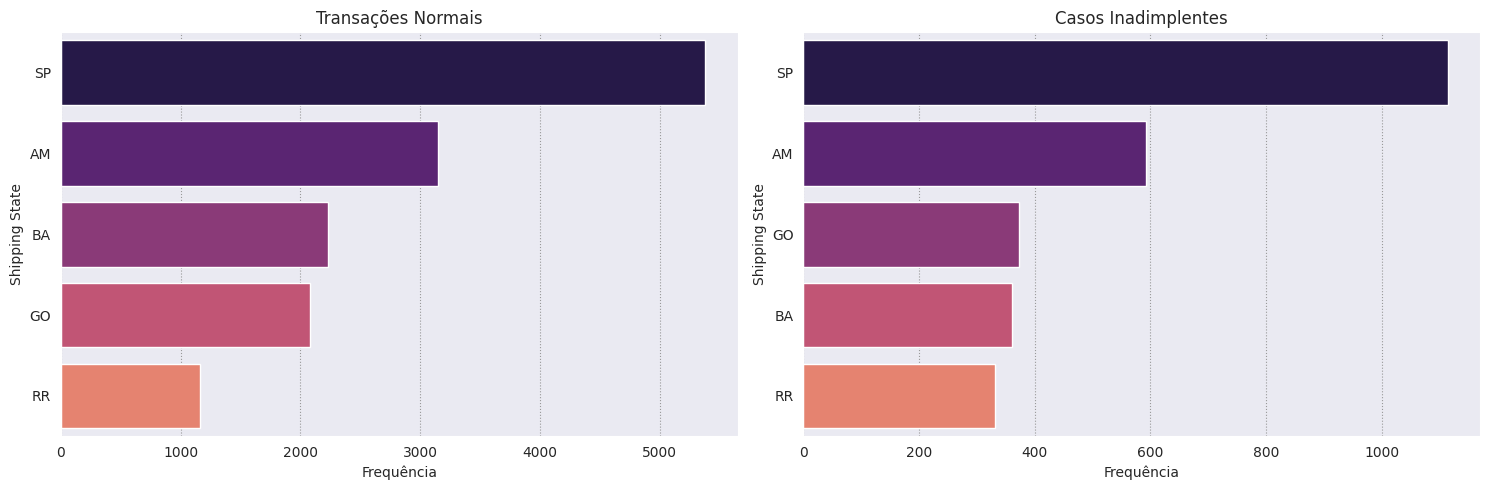

In [23]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

x = df_group1['shipping_state'].loc[df_group1.target_default == False].value_counts().values[:5]
y = df_group1['shipping_state'].loc[df_group1.target_default == False].value_counts().index[:5]

xx = df_group1['shipping_state'].loc[df_group1.target_default == True].value_counts().values[:5]
yy = df_group1['shipping_state'].loc[df_group1.target_default == True].value_counts().index[:5]

sns.set_palette("magma")

sns.barplot(x=x, y=y, ax=ax[0])
ax[0].set_title('Transações Normais')
ax[0].set_xlabel('Frequência')
ax[0].set_ylabel('Shipping State')

sns.barplot(x=xx, y=yy, ax=ax[1])
ax[1].set_title('Casos Inadimplentes')
ax[1].set_xlabel('Frequência')
ax[1].set_ylabel('Shipping State')

plt.tight_layout()
plt.show()


Clientes pagantes: SP, AM, BA, GO e RR.
Inadimplentes: SP, AM, GO, BA e RR.

Agora verificarei as informações estatísticas das variáveis.

In [24]:
# Verificar informações estatísticas
df_group1.describe()

,income,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues,application_time_in_funnel,reported_income,shipping_zip_code
count,44438.00,44303.00,44426.00,44438.00,33456.00,45000.00,45000.00,45000.00
mean,71607.39,0.08,0.00,10.70,11.07,247.54,inf,33923.51
std,51858.97,0.27,0.08,4.59,4.60,146.12,NaN,12692.41
min,4821.18,0.00,0.00,0.00,0.00,0.00,403.00,12001.00
25%,45010.78,0.00,0.00,7.00,8.00,120.00,50948.25,22937.00
50%,61266.76,0.00,0.00,10.00,10.00,248.00,101779.00,33896.00
75%,86019.23,0.00,0.00,13.00,14.00,375.00,151337.25,44910.00
max,5000027.83,5.00,5.00,49.00,49.00,500.00,inf,56000.00


Observa-se o seguinte:

- A variável `income` exibe a presença significativa de **outliers**, onde a mediana de renda é **61.267**, porém o valor máximo atinge **5.000.028**.
- A variável `reported_income` possui um valor máximo que não é válido, sendo infinito.
- A maioria dos usuários não apresenta registros de falências anteriores, conforme indicado por `n_bankruptcies`.
- A maioria dos usuários não possui histórico de inadimplência, como evidenciado por `n_defaulted_loans`.
- Os valores de renda reportados pela fonte externa em `reported_income` exibem características distintas da renda auto-reportada pelos usuários em `income`.

Primeiramente, abordaremos a variável `income` por meio da plotagem de um histograma.

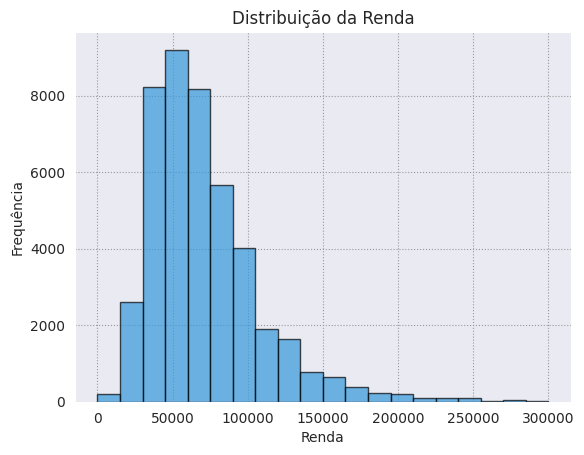

In [25]:
# Definindo a quantidade de bins e o intervalo do histograma
num_bins = 20
range_values = (0, 300000)

# Plotando o histograma com cores personalizadas
plt.hist(df.income, bins=num_bins, range=range_values, color='#3498db', edgecolor='black', alpha=0.7)

# Adicionando título e rótulos aos eixos
plt.title('Distribuição da Renda')
plt.xlabel('Renda')
plt.ylabel('Frequência')

# Exibindo o histograma
plt.show()


Pelo histograma, podemos observar que a frequência da renda começa a diminuir quando ultrapassa 200.000. Agora, vou criar um boxplot que inclui o conjunto de dados original e outro conjunto de dados em que a renda é inferior a essa quantia. Isso nos permitirá visualizar melhor as diferenças nas distribuições de renda.

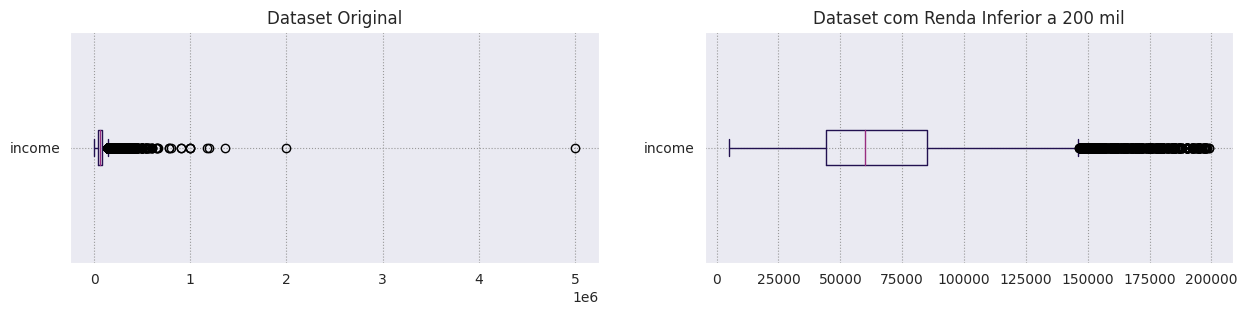

777 Entradas acima de 200 mil
Representam 1.73% do dataset


In [26]:
# verificar o conjunto de dados original
fig, ax = plt.subplots(1, 2, figsize=(15,3))
df.income.plot(kind='box', vert=False, ax = ax[0]);
df.income.loc[df.income <= 200000].plot(kind='box', vert=False, ax = ax[1]);
ax[0].set_title('Dataset Original')
ax[1].set_title('Dataset com Renda Inferior a 200 mil')
plt.show()

print("{} Entradas acima de 200 mil".format(len(df[df.income > 200000])))
print("Representam {:.2f}% do dataset".format((len(df[df.income > 200000]) / df.shape[0])*100))

Ao analisar a visualização dos dados, torna-se evidente que a variável "income" apresenta uma quantidade considerável de outliers. Existem 777 registros com renda superior a 200 mil, representando 1.73% do conjunto de dados.

Adicionalmente, a variável "reported_income" contém valores infinitos (inf) em sua coluna. Vamos verificar qual a proporção desses valores em relação ao dataset.

In [27]:
# Conferir a quantidade de valores inf em `reported_income`
print("{} Entradas com valores inf".format(np.isinf(df['reported_income']).sum()))
print("Representam {:.2f}% do dataset".format((np.isinf(df['reported_income']).sum()/ df.shape[0])*100))

67 Entradas com valores inf
Representam 0.15% do dataset


Dado que os valores infinitos (inf) compreendem apenas 0.15% do conjunto de dados, decidi pela exclusão desses valores. Na sequência, planejo traçar um histograma para a variável em questão, a fim de aprofundar a compreensão da frequência dos dados, além de explorar as informações estatísticas associadas à variável.

In [28]:
# substituir valores inf por NaN
df['reported_income'] = df['reported_income'].replace([np.inf, -np.inf], np.nan)

# deletar valores NaN da coluna reported_income
df = df.dropna(subset=['reported_income'])

In [29]:
df.reported_income.describe()


count              44933.00
mean      10325415545677.84
std      255964775525338.34
min                  403.00
25%                50856.00
50%               101630.00
75%               151187.00
max     6355500000111444.00
Name: reported_income, dtype: float64

In [30]:
# Verificar a quantidade com receita máxima reportada
df.loc[df.reported_income == df.reported_income.max()].shape[0]

73

Um total de 73 usuários apresentou renda significativamente discrepante, caracterizando outliers. Essa discrepância pode ser resultado de erro de digitação ou outra razão, contudo, tal disparidade dificulta a visualização dos dados de maneira clara e informativa. Assim, a solução adotada será a plotagem de um histograma, onde o intervalo de renda será limitado a 300 mil para proporcionar uma melhor compreensão da distribuição.

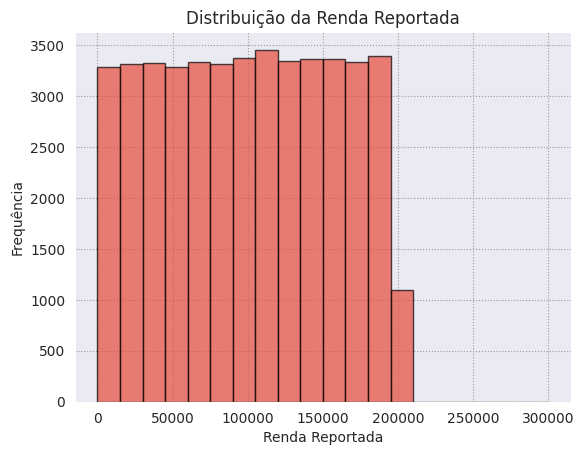

In [31]:
# Definindo a quantidade de bins e o intervalo do histograma
num_bins = 20
range_values = (0, 300000)

# Plotando o histograma com cores personalizadas
plt.hist(df.reported_income, bins=num_bins, range=range_values, color='#e74c3c', edgecolor='black', alpha=0.7)

# Adicionando título e rótulos aos eixos
plt.title('Distribuição da Renda Reportada')
plt.xlabel('Renda Reportada')
plt.ylabel('Frequência')

# Exibindo o histograma
plt.show()


A distribuição da renda reportada difere da renda inserida pelos clientes. Vamos agora analisar se a renda reportada apresenta variações na frequência entre clientes não inadimplentes e aqueles que estão inadimplentes.

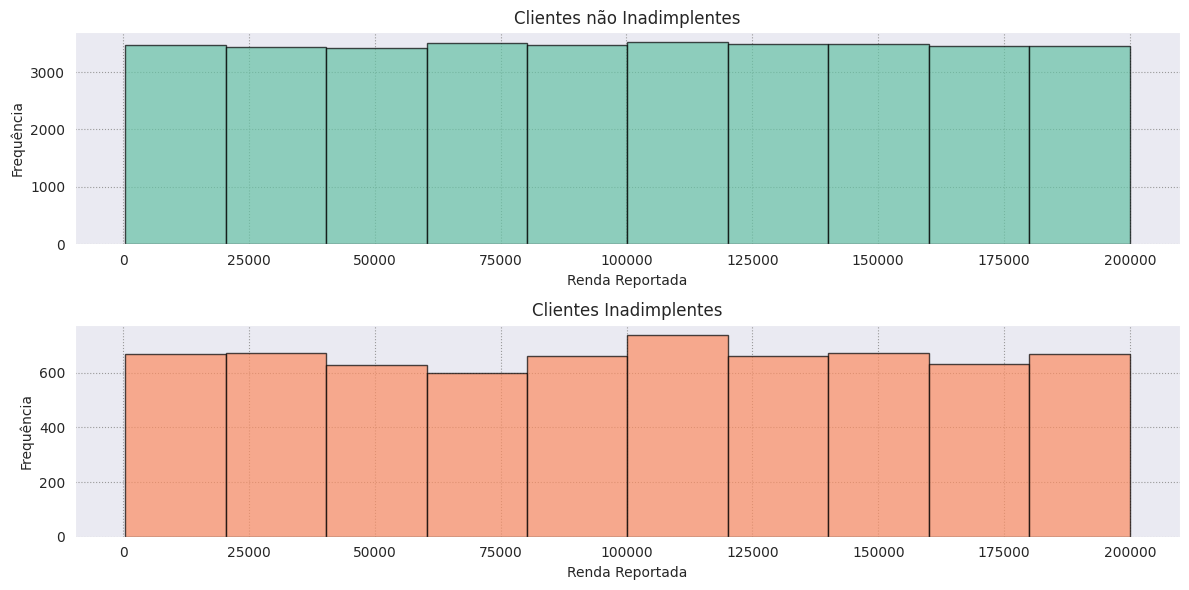

In [32]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12, 6))

sns.set_palette("Set2")  # Escolha uma paleta de cores adequada

ax[0].hist(df.reported_income.loc[(df.target_default == False) & (df.reported_income <= 500000)], color=sns.color_palette()[0], edgecolor='black', alpha=0.7)
ax[0].set_title('Clientes não Inadimplentes')

ax[1].hist(df.reported_income.loc[(df.target_default == True) & (df.reported_income <= 500000)], color=sns.color_palette()[1], edgecolor='black', alpha=0.7)
ax[1].set_title('Clientes Inadimplentes')

ax[0].set_xlabel('Renda Reportada')
ax[0].set_ylabel('Frequência')

ax[1].set_xlabel('Renda Reportada')
ax[1].set_ylabel('Frequência')

plt.tight_layout()
plt.show()


A renda reportada parece seguir um padrão semelhante para diferentes categorias de clientes.

Agora, vamos analisar a distribuição do número de falências anteriores dos candidatos.

In [33]:
df.n_bankruptcies.value_counts()


0.00    40935
1.00     3245
2.00       44
3.00        7
4.00        3
5.00        2
Name: n_bankruptcies, dtype: int64

É perceptível que a grande maioria dos candidatos nunca enfrentou falências anteriores.

Vamos agora examinar o número de empréstimos inadimplentes por candidato.

In [34]:
df.n_defaulted_loans.value_counts()


0.00    44185
1.00      152
2.00       17
3.00        4
5.00        1
Name: n_defaulted_loans, dtype: int64